In [2]:
import shap
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

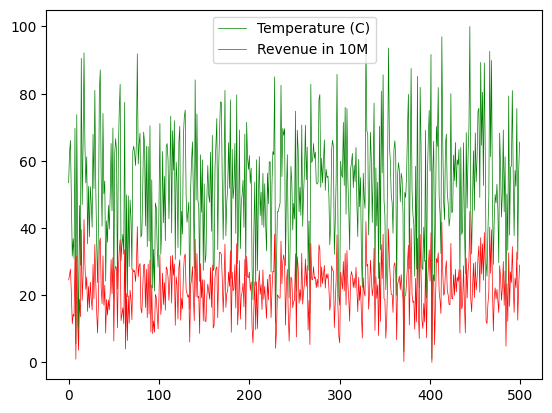

In [4]:
df = pd.read_csv("icecreamdata.csv")
plt.figure(1)
plt.plot(df['Revenue']/10,color='g',linewidth=0.5)
plt.plot(df['Temperature'],color='red',linewidth=0.5)
plt.legend(["Temperature (C)", "Revenue in 10M"])

In [6]:
x_train, x_test, y_train, y_test= train_test_split(df['Temperature'],df['Revenue'],test_size=0.2)
model = LinearRegression()
model.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
def abline(slope, intercept, x , y):
    """Plot a line from slope and intercept"""
    x_vals = np.linspace(min(x)-10,max(x)+10,30)
    y_vals = intercept + slope * x_vals
    plt.subplot()
    color = np.random.rand(100)
    plt.plot(x_vals, y_vals,color='r')
    plt.scatter(x,y,s=30,c=color,alpha=0.6)
    plt.show()

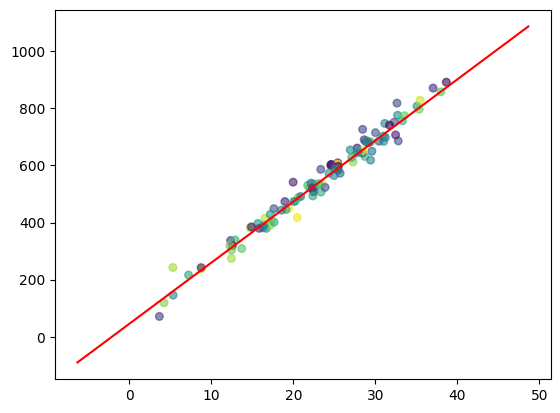

In [7]:
c,m=[model.intercept_[0],model.coef_[0][0]]
abline(m,c,x_test,y_test)

In [8]:
score = model.score(x_test.values.reshape(-1, 1),y_test.values.reshape(-1,1))
print(score)

0.9765201594637547


In [9]:
explainer = shap.Explainer(model.predict, x_test.values.reshape(-1,1))
shap_values = explainer( x_test.values.reshape(-1,1))

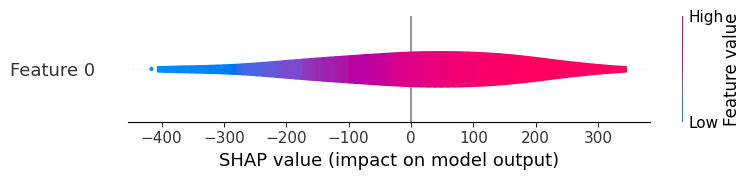

In [19]:
shap.summary_plot(shap_values,plot_type='violin')

In [14]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=7)
model.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
score = model.score(x_test.values.reshape(-1, 1),y_test.values.reshape(-1,1))
print(score)

0.9690697813919391


In [17]:
from sklearn import svm
model = svm.SVR(kernel='linear')
model.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
score = model.score(x_test.values.reshape(-1, 1),y_test.values.reshape(-1,1))
print(score)

0.9765180776396696


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
